In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Изменим стандартный размер графиков matplotlib
WIDTH_SIZE = 15
HEIGHT_SIZE = 10
plt.rcParams["figure.figsize"] = [WIDTH_SIZE, HEIGHT_SIZE]

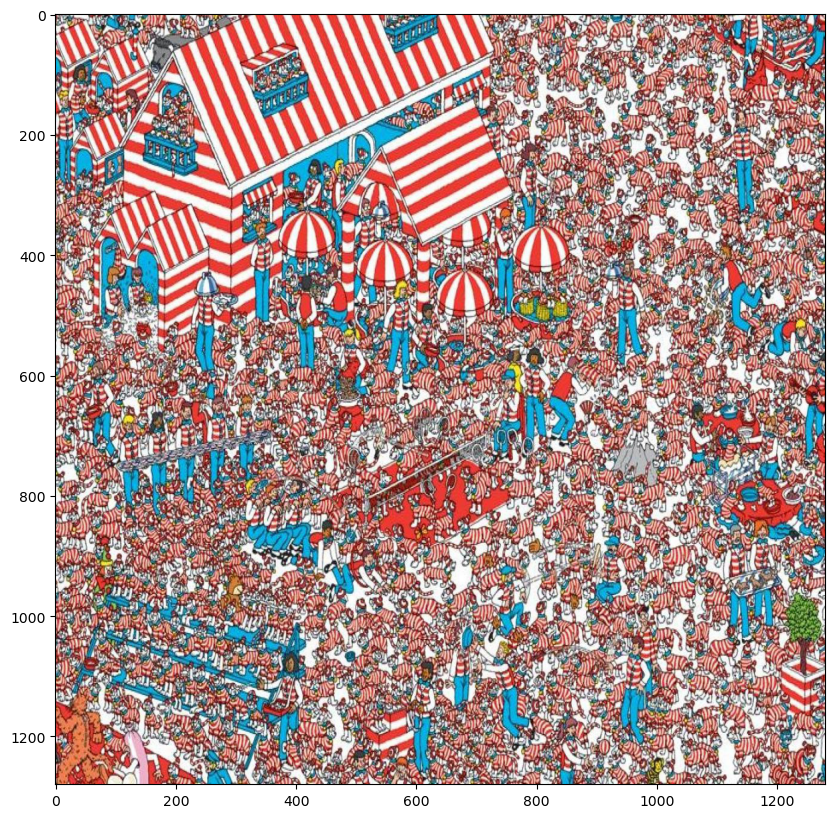

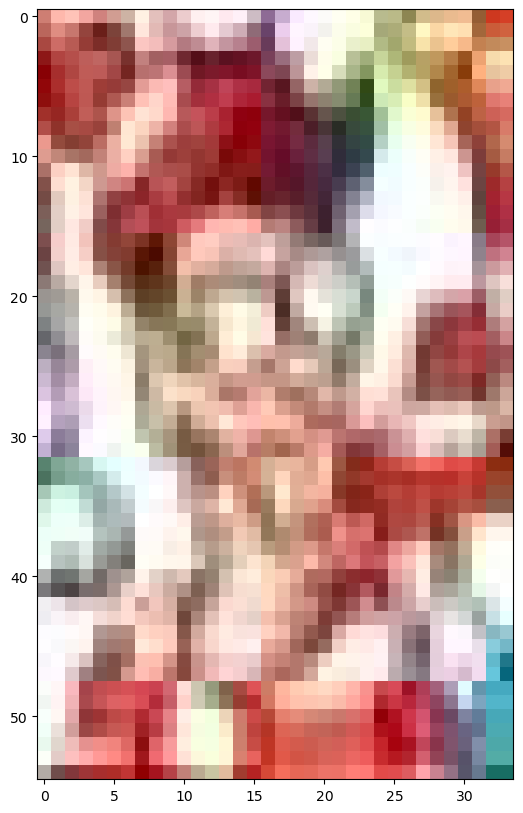

In [3]:
rgb_img = cv2.imread('../images/lr7.1.jpg') 
plt.figure()
plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('../images/lr7.2.jpg')
plt.figure()
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
gray_templ = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)  

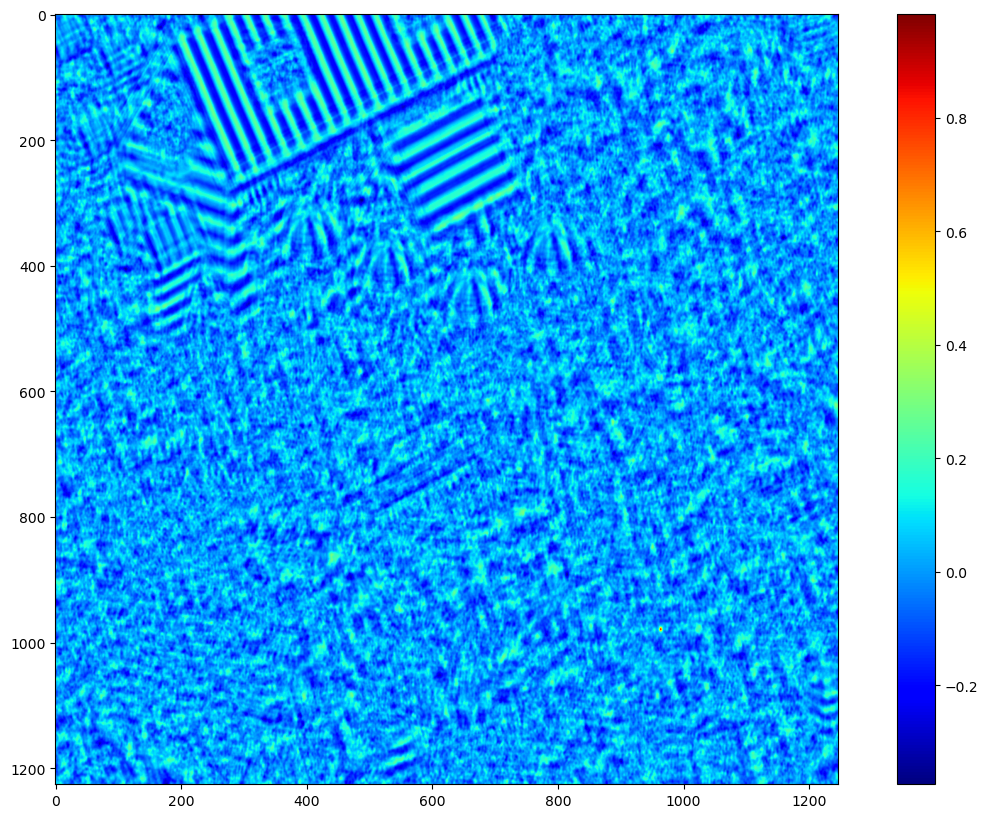

In [4]:
h, w = template.shape[:-1] 

res = cv2.matchTemplate(gray_img,gray_templ,cv2.TM_CCOEFF_NORMED)  
plt.figure()
plt.imshow(res, cmap='jet')
plt.colorbar()

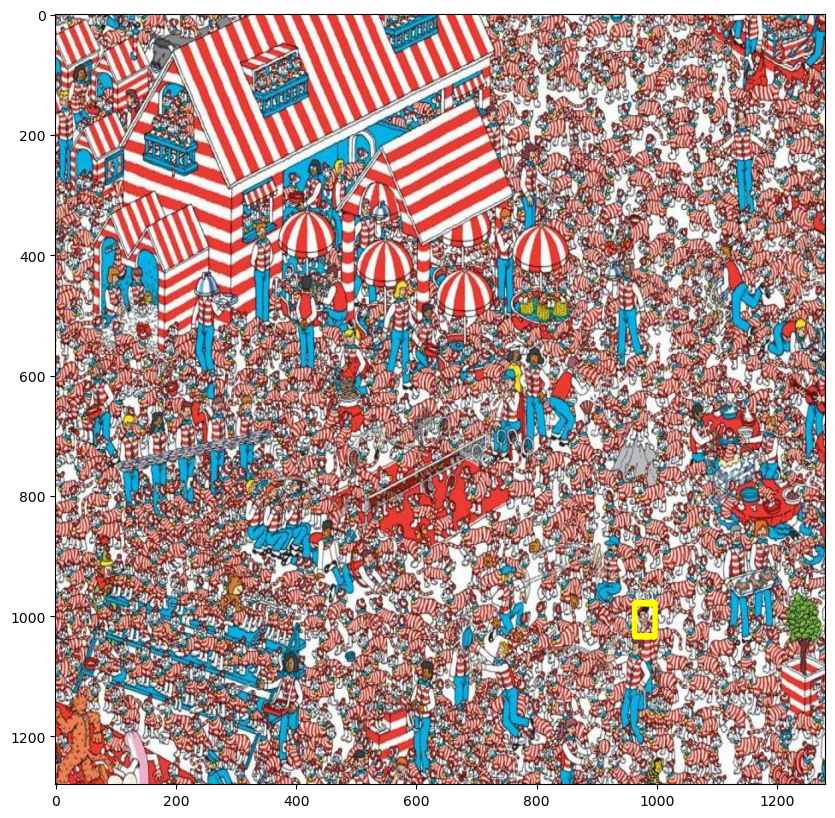

In [5]:
threshold = 0.8
loc = np.where(res >= threshold)
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = rgb_img.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(plot_img, pt,(pt[0] + w, pt[1] + h),(0,255,255), 8)  

plt.figure()
plt.imshow(cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB))
